In [5]:
############### load library ###################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [6]:
############### load dataset  ###################
input_file = 'RawData_ZERO.csv'
df = pd.read_csv(input_file)

# print(dataset)

In [7]:
############### summerize data  ###################
df.columns


Index(['Restatement_Classifier', 'CIK', 'CFOChange', 'PriorRestatements',
       'PriorRevisions', 'PYEffectiveControls', 'ticker', 'Periodend',
       'Auditor_Key', 'AuditorBigFour',
       ...
       'SoftAssets_YOY', 'DSO_YOY', 'Market_Cap_YOY', 'RevenueToPrefStock',
       'SGAExpense_to_LTInvest', 'Assets_to_LTInvest', 'Revenue_to_LTInvest',
       'Assets_to_STInvest', 'FirstTenK', 'WCAccruals'],
      dtype='object', length=209)

In [8]:
df.shape


(34541, 209)

In [9]:
df.describe()

Restatement_Classifier           CIK     CFOChange  PriorRestatements  \
count            34541.000000  3.454100e+04  34541.000000       34541.000000   
mean                 0.034307  9.963069e+05      0.125850           0.228916   
std                  0.182019  4.458449e+05      0.331686           0.420141   
min                  0.000000  1.750000e+03      0.000000           0.000000   
25%                  0.000000  8.202370e+05      0.000000           0.000000   
50%                  0.000000  1.066764e+06      0.000000           0.000000   
75%                  0.000000  1.366340e+06      0.000000           0.000000   
max                  1.000000  1.660719e+06      1.000000           1.000000   

       PriorRevisions  PYEffectiveControls     Periodend   Auditor_Key  \
count    34541.000000         34541.000000  34541.000000  34541.000000   
mean         0.343707             0.822443   2013.432790   3070.038679   
std          0.474952             0.382145      1.764519   6191.161563   
min          0.000000             0.000000   2008.000000      1.000000   
25%          0.000000             1.000000   2012.000000      2.000000   
50%          0.000000             1.000000   2013.000000      4.000000   
75%          1.000000             1.000000   2015.000000   2194.000000   
max          1.000000             1.000000   2016.000000  29648.000000   

       AuditorBigFour  AuditorNextFour  ...  SoftAssets_YOY       DSO_YOY  \
count    34541.000000     34541.000000  ...    34541.000000  34541.000000   
mean         0.521844         0.105382  ...        0.085916      0.027780   
std          0.499530         0.307049  ...        0.429660      0.386683   
min          0.000000         0.000000  ...       -1.000000     -1.000000   
25%          0.000000         0.000000  ...       -0.080960     -0.076501   
50%          1.000000         0.000000  ...        0.023056      0.000000   
75%          1.000000         0.000000  ...        0.196433      0.080810   
max          1.000000         1.000000  ...        1.000000      1.000000   

       Market_Cap_YOY  RevenueToPrefStock  SGAExpense_to_LTInvest  \
count    34541.000000        3.454100e+04            3.454100e+04   
mean         0.077824        2.580118e+09            7.588621e+05   
std          0.391587        1.344270e+10            1.525424e+07   
min         -1.000000       -1.896010e+09           -2.505515e+07   
25%         -0.049144        1.574257e+05            1.417623e-01   
50%          0.000000        7.432673e+07            2.723719e+00   
75%          0.219608        9.462426e+08            2.483515e+01   
max          1.000000        4.816130e+11            1.186890e+09   

       Assets_to_LTInvest  Revenue_to_LTInvest  Assets_to_STInvest  \
count        3.454100e+04         3.454100e+04        3.454100e+04   
mean         7.400146e+06         2.050354e+06        8.559767e+09   
std          2.780319e+08         4.716745e+07        4.663196e+11   
min         -2.740606e+07        -1.896010e+09       -2.127182e+06   
25%          3.669970e+00         1.275571e-01        3.719722e+00   
50%          1.888350e+01         6.787634e+00        1.173536e+01   
75%          9.101869e+01         4.545093e+01        4.232019e+01   
max          3.346040e+10         3.243228e+09        3.579820e+13   

          FirstTenK    WCAccruals  
count  34541.000000  34541.000000  
mean    1968.764425     -5.372452  
std      268.386901    436.648344  
min        0.000000 -42224.000000  
25%     2001.000000     -0.066814  
50%     2004.000000     -0.004228  
75%     2009.000000      0.032645  
max     2017.000000  24312.533330  

[8 rows x 208 columns]

In [10]:
# check NA
df.isnull().values.any()

False

In [11]:
# Total missing values for each feature

# missing_val_count_by_column = (df.isnull().sum())

# print(missing_val_count_by_column[missing_val_count_by_column > 0])


In [12]:
# use df._get_numeric_data() to get numeric columns and then find out categorical columns
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

list(set(cols) - set(num_cols))

['ticker']

In [13]:
# data transformation
df['Restatement_Classifier'] = df['Restatement_Classifier'].astype('category')
df['ticker'] = df['ticker'].astype('category')


In [14]:
cat_columns = df.select_dtypes(['category']).columns
print(cat_columns)

Index(['Restatement_Classifier', 'ticker'], dtype='object')


In [15]:
# Then we transfer all those category value into integer like below command
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
print(df)

       Restatement_Classifier      CIK  CFOChange  PriorRestatements  \
0                           0  1365357          0                  1   
1                           0  1125264          0                  1   
2                           0  1069152          0                  1   
3                           0   846475          0                  1   
4                           0  1318008          0                  0   
...                       ...      ...        ...                ...   
34536                       0    26172          1                  0   
34537                       0    18230          0                  0   
34538                       0   941548          0                  0   
34539                       0   874761          0                  1   
34540                       0     1800          0                  0   

       PriorRevisions  PYEffectiveControls  ticker  Periodend  Auditor_Key  \
0                   1                    1    8416       

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

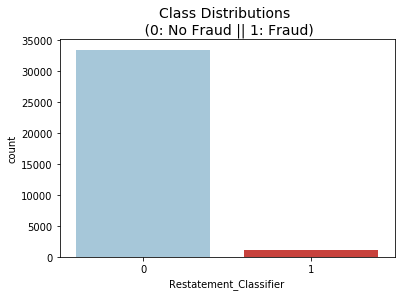

In [16]:
# target variable distribution
colors = ["#9ecae1", "#de2d26"]
sns.countplot(x='Restatement_Classifier', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

In [17]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Restatement_Classifier'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Restatement_Classifier'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 96.57 % of the dataset
Frauds 3.43 % of the dataset


In [18]:
import numpy as np

# Split data

np.random.seed(888)
msk = np.random.rand(len(df)) <= 0.666
train = df[msk]
test = df[~msk]
print(train['Restatement_Classifier'].value_counts(), len(train))
print(test['Restatement_Classifier'].value_counts(), len(test))

0    22144
1      791
Name: Restatement_Classifier, dtype: int64 22935
0    11212
1      394
Name: Restatement_Classifier, dtype: int64 11606


In [19]:
#################### Decision Tree ######################
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features = list(df.columns[1:])
print(features)
y = train["Restatement_Classifier"]
X = train[features]
model_DecisionTree_v01 = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v01.fit(X, y)

['CIK', 'CFOChange', 'PriorRestatements', 'PriorRevisions', 'PYEffectiveControls', 'ticker', 'Periodend', 'Auditor_Key', 'AuditorBigFour', 'AuditorNextFour', 'AuditorSmall', 'AuditFeeTotal', 'tag_count', 'XBRLExtendedPct', 'Market_Cap', 'Cash', 'AccountsReceivable', 'AllowanceForDoubtfulAccountsReceivable', 'Inventory', 'ShortTermInvestments', 'CurrentAssets', 'PPE', 'Assets', 'AccountsPayable', 'ShortTermDebt', 'CurrentTaxliability', 'NoncurrentTaxLiability', 'CurrentLiabilities', 'LongTermDebt', 'Liabilities', 'StockholdersEquity', 'PreferredStockValue', 'CommonStockValue', 'RetainedEarnings', 'RevenueAdjusted', 'CostOfRevenue', 'DepreciationAmortization', 'DepreciationAndAmortizationExpense', 'SGAExpense', 'InterestExpense', 'NetInterestIncome', 'IncomeTaxes', 'NetIncomeContinuingOperations', 'NetIncome', 'FinancingCashFlow', 'Revenue', 'ExciseAndSalesTaxes', 'NonInterestIncome', 'ProvisionForLoanLoss', 'GrossProfit', 'ResearchAndDevelopment', 'OperatingExpenses', 'OperatingExpenseE

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=99,
            splitter='best')

In [20]:
#DT + normal sample

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

#pip install pydotplus
#conda install graphviz


dot_data = StringIO()
export_graphviz(model_DecisionTree_v01, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

[[10933   279]
 [  358    36]]


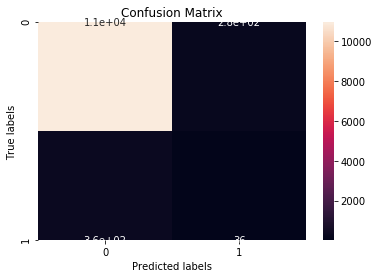

In [21]:
from sklearn.metrics import confusion_matrix

y_pred = model_DecisionTree_v01.predict(test[features])
y_true = list(test["Restatement_Classifier"])

labels = [0, 1]
cm = confusion_matrix(y_true, y_pred, labels)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [22]:
from sklearn.metrics import roc_auc_score
AUC_ROC_SCORE = roc_auc_score(y_true, y_pred)

print(AUC_ROC_SCORE)

0.5332432527875318


In [23]:
#DT + Over sample

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=99)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_DecisionTree_v02_overSample = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v02_overSample.fit(X_resampled, y_resampled)

y_pred_v02 = model_DecisionTree_v02_overSample.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_v02 = roc_auc_score(y_true, y_pred_v02)
print(AUC_ROC_SCORE_v02)

44288
44288
0.5358182223180024


In [25]:
#DT + Under sample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=99)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_DecisionTree_v03_underSample = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v03_underSample.fit(X_resampled, y_resampled)

y_pred_v03 = model_DecisionTree_v03_underSample.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_v03 = roc_auc_score(y_true, y_pred_v03)
print(AUC_ROC_SCORE_v03)

1582
1582
0.5775607987091423


In [28]:
#DT + SMOTE Sample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_DecisionTree_v04_SMOTE = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_DecisionTree_v04_SMOTE.fit(X_resampled, y_resampled)

y_pred_v04 = model_DecisionTree_v04_SMOTE.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_v04 = roc_auc_score(y_true, y_pred_v04)
print(AUC_ROC_SCORE_v04)

44288
44288
0.5554384714709222


In [29]:

TP = cm[0,0]
FP = cm[0,1]
TN = cm[1,0]
FN = cm[1,1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

print(TPR, TNR, PPV, NPV, FPR, FNR, FDR)

#type I error is the rejection of a true null hypothesis (also known as a "false positive")
#type II error is the non-rejection of a false null hypothesis (also known as a "false negative")
print("TYPE  I ERROR:", FPR)
print("TYPE II ERROR:", FNR)

0.9967180235208314 0.5620094191522763 0.9751159471994292 0.9086294416243654 0.4379905808477237 0.0032819764791685658 0.024884052800570818
TYPE  I ERROR: 0.4379905808477237
TYPE II ERROR: 0.0032819764791685658


In [33]:

#Normal sample
from sklearn.ensemble import RandomForestClassifier

model_randomforest_v01 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_randomforest_v01.fit(X, y)

y_pred_random_forest_v01 = model_randomforest_v01.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_random_forest_v01 = roc_auc_score(y_true, y_pred_random_forest_v01)
print(AUC_ROC_SCORE_random_forest_v01)

0.5


In [35]:
#RF + Over sample
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=99)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_randomforest_v02 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_randomforest_v02.fit(X_resampled, y_resampled)

y_pred_random_forest_v02 = model_randomforest_v02.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_random_forest_v02 = roc_auc_score(y_true, y_pred_random_forest_v02)
print(AUC_ROC_SCORE_random_forest_v02)

44288
44288
0.6130068671890704


In [36]:
#RF + Under sample
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=99)
X_resampled, y_resampled = rus.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_randomforest_v03 = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_randomforest_v03.fit(X_resampled, y_resampled)

y_pred_random_forest_v03 = model_randomforest_v03.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_random_forest_v03 = roc_auc_score(y_true, y_pred_random_forest_v03)
print(AUC_ROC_SCORE_random_forest_v03)

1582
1582
0.5775607987091423


In [38]:
#RF + SMOTE Sample
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print(len(X_resampled))
print(len(y_resampled))

model_randomforest_v04 = DecisionTreeClassifier(min_samples_split=20, random_state=99)
model_randomforest_v04.fit(X_resampled, y_resampled)

y_pred_random_forest_v04 = model_randomforest_v04.predict(test[features])
y_true = list(test["Restatement_Classifier"])

AUC_ROC_SCORE_random_forest_v04 = roc_auc_score(y_true, y_pred_random_forest_v04)
print(AUC_ROC_SCORE_random_forest_v04)

44288
44288
0.5554384714709222
